<div style="border:solid green 2px; padding: 20px">
<b>Привет, Дарья!</b>

Меня зовут Марина К, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай мне знать, и мы перейдем на «вы». 

Ты проделала большую работу над проектом, но давай сделаем его еще лучше! Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарии ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарии ревьюера:</b> Так выделены небольшие замечания. Одно-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления.  </div>

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Так я выделяю все остальные комментарии, твои удачные решения, комментарии по твоим промежуточным выводам и даю подсказки, как можно улучшить твоё решение.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>

# Аналитика в авиакомпании

«F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.

Нам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

## Аналитика средствами Python

Получены файлы, в которых содержатся результаты запросов из предыдущих заданий.

*/datasets/query_1.csv* — результат первого запроса. В нём содержится информация о:
* *model* — модели самолета;
* *flights_amount* — количество рейсов для каждой модели самолетов model в сентябре 2018 года.

*/datasets/query_3.csv* — результат третьего запроса. В нём содержится информация о:
* *city* — городах;
* *average_flights* — среднем количестве рейсов, прибывающих в город *city* за день в августе 2018 года.

Для этих двух наборов данных нужно:
* импортировать файлы;
* изучить данные в них;
* проверить типы данных на корректность;
* выбрать топ-10 городов по количеству рейсов;
* построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
* сделать выводы по каждому из графиков, пояснить результат.

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Отличное введение - четкое и лаконичное. В будущем проекты более объемные и нам будет удобнее использовать план со ссылками. Почитать о том, как его сделать, можно в студенческом ноушене. Если будут проблемы с доступом в ноушен, можно обратиться к куратору :)</div>

### 1. Импорт и изучение данных

Импортируем все необходимые для решения поставленных задач библиотеки.

In [1]:
# <импорт библиотеки pandas>
import pandas as pd

# <импорт библиотеки matplotlib для работы с графиками>
import matplotlib.pyplot as plt

# <импорт библиотеки seaborn для работы со статистическими графиками>
import seaborn as sns

# <импорт библиотеки scipy>
from scipy import stats as st

pd.options.mode.chained_assignment = None

Прочитаем все файлы .csv и сохраним их.

In [2]:
# <чтение файлов с данными о моделях самолёта и количестве рейсов для каждой модели самолетов model в сентябре 2018 года
# и сохранение в переменную query_1>
query_1 = pd.read_csv('/datasets/query_1.csv')

# <чтение файлов с данными о городах и среднем количестве рейсов, прибывающих в город city за день в августе 2018 года
# и сохранение в переменную query_3>
query_3 = pd.read_csv('/datasets/query_3.csv')

Рассмотрим каждый из датасетов по отдельности. Начнем с *query_1*.

Выведем первые строки таблицы *query_1*.

In [3]:
# <Получение первых 5 строк таблицы query_1>
query_1.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


Общая информация о данных таблицы *query_1*.

In [4]:
# <Получение общей информации о данных в таблице query_1>
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Таблица *query_1* содержит 8 строк и 2 столбца:
* *model* — информация о модели самолета (тип данных *object*);
* *flights_amount* — количество рейсов для каждой модели самолетов model в сентябре 2018 года (тип данных *int64*).

Тут с данными всё в порядке: нет пропущенных значений и дубликатов.

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Этот датасет маленький и если напечатать все строки, то, действительно, видно, что дубликатов нет. </div>

Рассмотрим '*query_3*'.

In [5]:
# <Получение первых 5 строк таблицы query_3>
query_3.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


Общая информация о данных таблицы *query_3*.

In [6]:
# <Получение общей информации о данных в таблице query_3>
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Таблица *query_3* содержит 101 строку и 2 столбца:
* *city* — информация о городах (тип данных *object*);
* *average_flights* — среднее количество рейсов, прибывающих в город *city* за день в августе 2018 года (тип данных *float64*).

Статистика - это хорошо, но 2.5 самолёта в день - это как "1.5 землекопа". Данные в столбце *'average_flights'* приведём к целочисленному типу.

Пропущенных значений нет, но на дубликаты проверим.

#### Вывод

Датасеты *query_1* и *query_3* открыты и изучены.

В таблице *query_1* никаких проблем с данными нет, а в таблице *query_3* необходимо изменить тип данных в столбце *'average_flights'* с *float64* на *int64*, а также, проверить наличие дубликатов.

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Здорово, что изучила данные. Нас в задании просят проверить типы данных на корректность. Ниже ты работаешь со столбцом  'average_flights' . Если у тебя нет замечаний к типам данных других столбцов, стоит  отметить это в отчете. </div>

### 2. Подготовка данных

Данные в столбце *'average_flights'* *query_3* таблицы приведём к целочисленному типу.

In [7]:
# <Приведём данные  в столбце 'average_flights' к целочисленному типу>
query_3['average_flights'] = query_3['average_flights'].astype('int')

# <Выведем первые 5 строк таблицы query_3>
query_3.head()

,city,average_flights
0,Абакан,3
1,Анадырь,1
2,Анапа,2
3,Архангельск,5
4,Астрахань,2


Отлично! И никаких "1.5 землекопа"!

Проверим таблицу *query_3* на наличие дубликатов.

In [8]:
# <Проверим наличие в таблице 'query_3' дубликатов>
query_3.duplicated().sum()

0

#### Вывод

Все данные приведены к нужным типам. Дубликатов - нет.

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Отлично, предоработка завершена. </div>

### 3. Исследовательский анализ данных

* Топ-10 городов по количеству рейсов

In [9]:
# <Отсортируем таблицу query_3 по столбцу 'average_flights' в порядке убывания и сохраним в таблицу top10_cities>
top10_cities = query_3.sort_values(by='average_flights', ascending=False).head(10)

# <Выведем таблицу top10_cities>
top10_cities

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
63,Пермь,10
67,Ростов-на-Дону,10
10,Брянск,10
84,Ульяновск,9
73,Советский,9


#### Вывод

Как и ожидалось, в переди планеты всей, а точнее, всей страны - Москва. В 4 раза меньше рейсов у Северной столицы, и в 7.5 - у столицы Сибири.

*  График зависимости количества рейсов от модели самолета

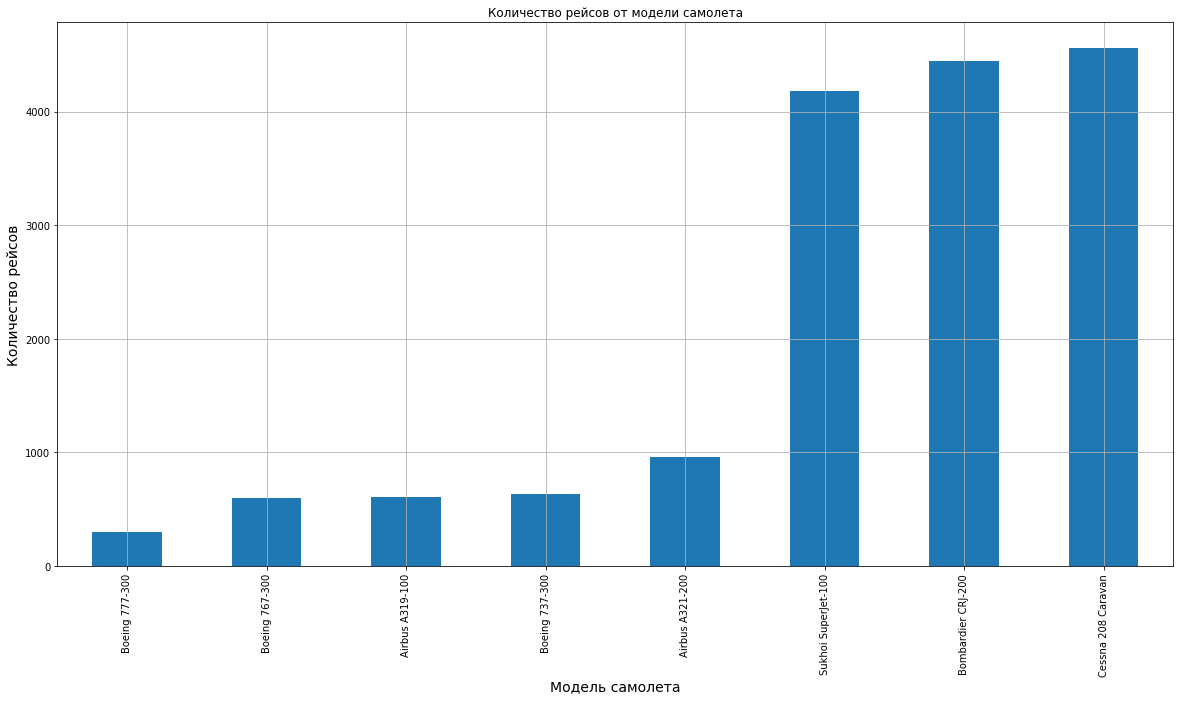

In [10]:
# <Построим для каждой модели самолета график количества рейсов>
(
    query_1
    .sort_values(by='flights_amount')
    .plot(kind = 'bar', grid=True, legend=False, title="Количество рейсов от модели самолета",
          x='model', y='flights_amount', figsize=(20, 10))
)
plt.ylabel('Количество рейсов', fontsize=14)
plt.xlabel('Модель самолета', fontsize=14)
plt.show()

#### Вывод

Меньше всего перелетов у крупнейшего Boeing 777-300. Это связано с тем, что такие большие самолёты способны перевозить большее количество людей. И как, правило, их используют для дальних рейсов. Их обслуживание значительно дороже их "меньших собратьев".

Самолеты моделей Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100 совершают значительно большее количество полетов по сравнению с другими моделями: эти самолеты маленькие и их могут запускать на короткие направления, возможно поэтому они совершают количество перелетов в несколько раз превышающее количество перелетов других (больших) моделей.

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Согласна с твоими выводами. Тип графика выбран верно, здесь лучше всего подойдет столбиковая диаграмма. Можно немного подкорректировать шрифт названия, чтобы было более читаемо. </div>

*  График зависимости количества рейсов от города

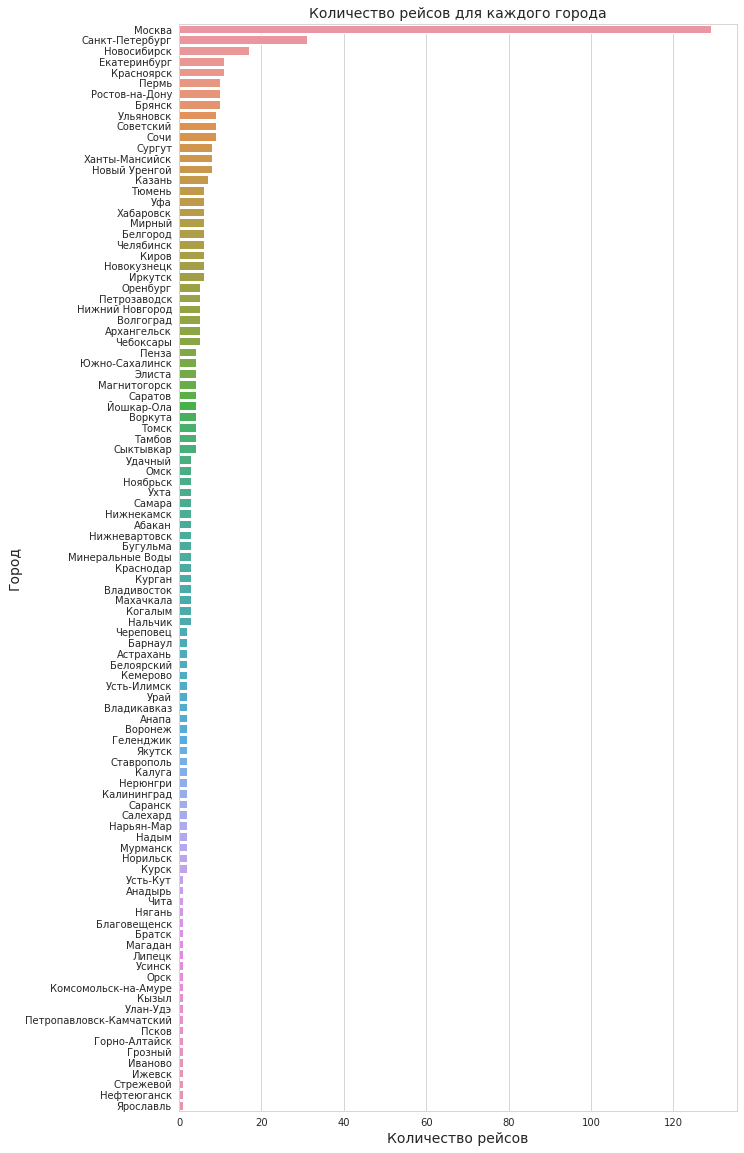

In [11]:
# <Построим для каждого города график среднего количества рейсов>
sns.set_style("whitegrid")
plt.figure(figsize=(10, 20))
plt.title('Количество рейсов для каждого города', fontsize=14)
sns.barplot(x='average_flights',
            y='city',
            data=query_3.sort_values(by='average_flights', ascending=False))
plt.ylabel('Город', fontsize=14)
plt.xlabel('Количество рейсов', fontsize=14)
plt.show()

#### Вывод

Как мы уже знаем, Москва - лидер по количеству перелётов. Причём с большим отрывом. У большинства городов по 5 - 10 перелётов в среднем. Москва - главный транспортный узел авиасообщения (4 аэропорта), и даже если лететь из Краснодара в Самару, то пересадка будет в Москве. Не все внутренние рейсы "прямые", зато почти все - через Москву.

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Отлично! Молодец, что расположила столбики по горизонтали, так нагляднее всего.  </div>

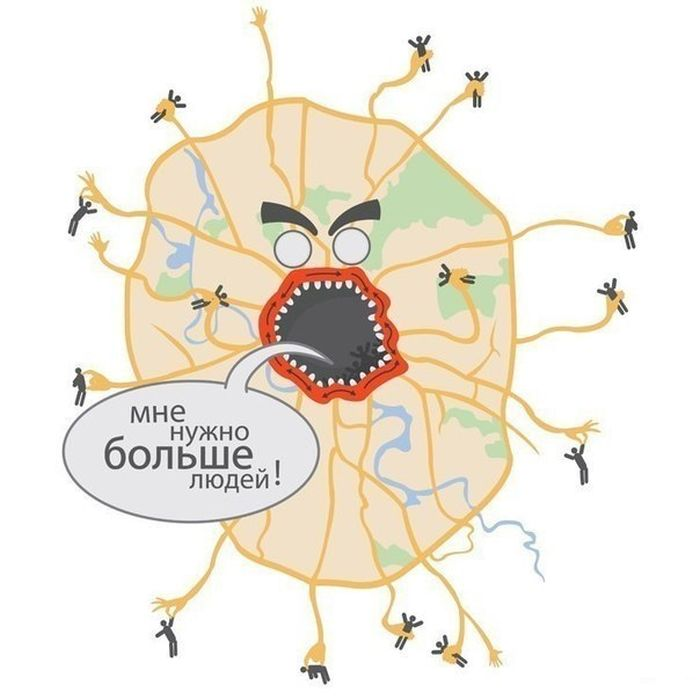

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Это прекрасно :)</div>

*  График количества рейсов для топ-10 городов

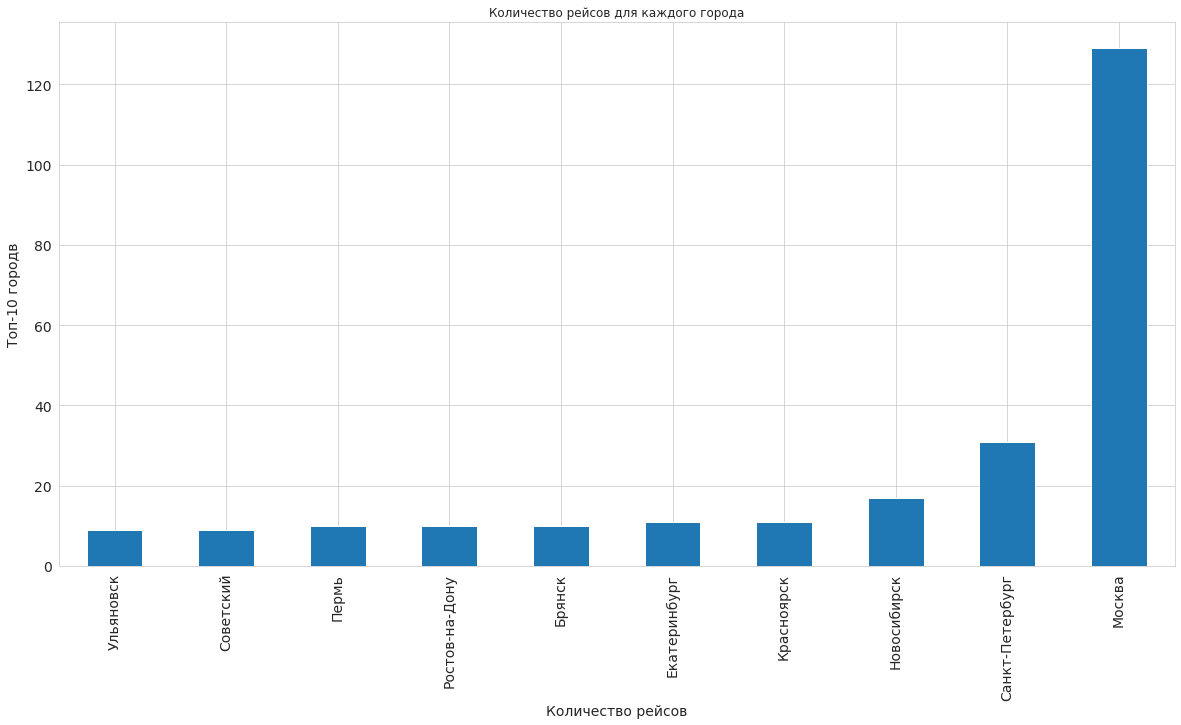

In [12]:
# <Построим для каждого города из Топ-10 график среднего количества рейсов>
(
    top10_cities
    .sort_values(by='average_flights', ascending=True)
    .plot(kind = 'bar', grid=True, legend=False, title="Количество рейсов для каждого города",
          x='city', y='average_flights', figsize=(20, 10), fontsize=14)
)
plt.ylabel('Топ-10 городв', fontsize=14)
plt.xlabel('Количество рейсов', fontsize=14)
plt.show()

#### Вывод

Как мы уже знаем, Москву не обогнать. В топ-3 попали Санкт-Петербург (Северная и туристическая Столица) и Новосибирск (Столица Сибири и крупнейший промышленный центр страны). Остальные города из "десятки" - крупные областные и региональные центры. Однако, количество перелетов для каждого из них находится около значения 10. Стоит отметить, что все они находятся на значительном удалении от Москвы. Возможно, чем ближе город к Москве, тем приоритет авиатранспорта снижается перед альтернативами (поезда, авто). А вот из Москвы в Екатеринбург что на поезде, что на самолёте - цены одинаковые, а затраченное время в разы отличается в пользу авиатранспорта.

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Здесь бы тоже - чуть немного поправить размер шрифта у названия.  </div>

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Все твои визуализации получились хорошо оформленными - подписаны сами графики и их оси. Так держать! Если в будущих проектах тебе нужно будет несколько раз строить графики одного типа, стоит написать отдельную функцию для этого. Автоматизация наше все :) </div>

### 4. Общий вывод

Мы выяснили, что больше всего рейсов у самолётов лёгкого класса (Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100), т. к. их могут запускать на короткие направления, нежели большие и дорогие в обслуживании Боинги и Аэробусы - их применение целесообразно для дальних перелётов.

Больше всего перелётов в среднем совершается в Москве, а если быть точнее, то через Москву. Прямх рейсов между регионами мало. Большинство пересадок происходит в Москве. Благо, аэропортов хватает.

<div class="alert alert-success">
<b>Комментарии ревьюера:</b> Выводы понятны и логичны, а самое главное, подкреплены выявленными фактами.


В целом весь проект выполнен на хорошем уровне. Замечаний нет. Удачи в следующих проектах!
</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  фалы импортированы
- [x]  данные в файлах изучены
- [x]  типы данных проверены на корректность
- [x]  выбраны топ-10 городов по количеству рейсов
- [x]  построен график модели самолетов и количества рейсов
- [x]  построен график города и количества рейсов
- [x]  построен график топ-10 городов и количества рейсов
- [x]  по каждому из графиков сделаны выводы и пояснён результат
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод